In [6]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
train = pd.read_csv('../data/in/train.csv', delimiter=';')
test = pd.read_csv('../data/in/test.csv', delimiter=';')

In [9]:
train.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [44]:
train.cardio.describe()

count    70000.000000
mean         0.499700
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

In [43]:
for c in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:
    print(c)
    print(train[c].value_counts())
    print(test[c].value_counts())

gender
1    45530
2    24470
Name: gender, dtype: int64
1    19388
2    10612
Name: gender, dtype: int64
cholesterol
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64
1    22389
2     4181
3     3430
Name: cholesterol, dtype: int64
gluc
1    59479
3     5331
2     5190
Name: gluc, dtype: int64
1    25536
2     2247
3     2217
Name: gluc, dtype: int64
smoke
0    63831
1     6169
Name: smoke, dtype: int64
0       24601
None     3030
1        2369
Name: smoke, dtype: int64
alco
0    66236
1     3764
Name: alco, dtype: int64
0       25500
None     3031
1        1469
Name: alco, dtype: int64
active
1    56261
0    13739
Name: active, dtype: int64
1       21843
0        5260
None     2897
Name: active, dtype: int64


In [33]:
train.cholesterol.describe(), test.cholesterol.describe()

(count    70000.000000
 mean         1.366871
 std          0.680250
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          2.000000
 max          3.000000
 Name: cholesterol, dtype: float64, count    30000.000000
 mean         1.368033
 std          0.679166
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          2.000000
 max          3.000000
 Name: cholesterol, dtype: float64)

In [32]:
(train.age/365.25).describe(), (test.age/365.25).describe()

(count    70000.000000
 mean        53.302850
 std          6.754967
 min         29.563313
 25%         48.361396
 50%         53.943874
 75%         58.390144
 max         64.922656
 Name: age, dtype: float64, count    30000.000000
 mean        53.266334
 std          6.783959
 min         24.271047
 25%         48.344969
 50%         53.919233
 75%         58.370979
 max         64.900753
 Name: age, dtype: float64)

In [30]:
train.gender.describe()

count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64

In [29]:
train[train.ap_lo > 1000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
473,680,15226,1,150,95.0,150,1033,1,1,0,0,1,1
649,928,18190,1,166,57.0,190,1100,1,1,0,0,1,1
881,1229,17405,2,170,84.0,150,1100,1,1,1,0,0,1
1033,1438,15906,1,167,71.0,150,1001,2,1,0,0,1,1
1575,2231,18958,1,172,68.0,170,1200,1,1,0,0,1,1
1579,2236,17289,2,168,63.0,150,1100,1,1,1,1,1,0
1614,2285,14369,2,170,79.0,150,1100,1,1,0,0,0,1
2069,2928,21831,1,162,68.0,160,1100,1,1,0,0,1,1
2142,3026,15384,2,174,113.0,210,1100,1,1,0,0,1,1


In [36]:
train[(train.ap_hi > 300).values * (train.ap_hi < 1000).values]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
9557,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1
17713,25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
23867,34120,16131,1,161,92.0,906,0,2,1,0,0,1,1
29665,42410,17548,1,154,65.0,907,70,1,1,0,0,1,0
31783,45400,16070,1,170,64.0,907,0,1,1,0,0,1,0
40330,57646,20322,1,162,50.0,309,0,1,1,0,0,1,0
40831,58349,19806,1,162,67.0,401,80,1,3,0,0,1,1


In [37]:
test[(test.ap_hi > 300).values * (test.ap_hi < 1000).values]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
303,1079,22571,2,170,74.0,400,60,1,1,0,0,1
1685,5736,15180,1,147,53.0,907,70,1,1,None,0,1
6958,23199,18095,1,166,64.0,957,70,1,1,None,0,0
7463,24871,20609,1,168,56.0,906,60,2,1,0,0,None
9262,30877,15916,2,180,70.0,906,60,1,1,0,0,1
18857,62837,19912,2,170,79.0,509,0,1,1,0,0,1
26412,88161,16981,1,165,62.0,906,60,1,1,0,0,1
29982,99929,21976,2,164,79.0,906,0,1,1,1,0,1


In [28]:
train.ap_lo.describe(), test.ap_lo.describe()

(count    70000.000000
 mean        96.630414
 std        188.472530
 min        -70.000000
 25%         80.000000
 50%         80.000000
 75%         90.000000
 max      11000.000000
 Name: ap_lo, dtype: float64, count    30000.000000
 mean        95.689000
 std        163.852598
 min        -90.000000
 25%         80.000000
 50%         80.000000
 75%         90.000000
 max       9100.000000
 Name: ap_lo, dtype: float64)

In [27]:
train[train.height>200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,21220,1,250,86.0,140,100,3,1,0,0,1,1
21628,30894,19054,2,207,78.0,100,70,1,1,0,1,1,0


In [26]:
train.weight.describe(), test.weight.describe()

(count    70000.000000
 mean        74.205690
 std         14.395757
 min         10.000000
 25%         65.000000
 50%         72.000000
 75%         82.000000
 max        200.000000
 Name: weight, dtype: float64, count    30000.000000
 mean        74.120615
 std         14.341540
 min         10.000000
 25%         65.000000
 50%         72.000000
 75%         82.000000
 max        183.000000
 Name: weight, dtype: float64)

In [25]:
train.height.describe(), test.height.describe()

(count    70000.000000
 mean       164.359229
 std          8.210126
 min         55.000000
 25%        159.000000
 50%        165.000000
 75%        170.000000
 max        250.000000
 Name: height, dtype: float64, count    30000.000000
 mean       164.322267
 std          8.213740
 min         50.000000
 25%        159.000000
 50%        165.000000
 75%        170.000000
 max        198.000000
 Name: height, dtype: float64)

In [21]:
test.ap_hi.describe()

count    30000.000000
mean       130.271300
std        212.501152
min       -130.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [20]:
train.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [23]:
np.sum(train.ap_hi < 50), np.sum(train.ap_hi > 250)

(188, 40)

In [24]:
np.sum(test.ap_hi < 50), np.sum(test.ap_hi > 250)

(81, 19)

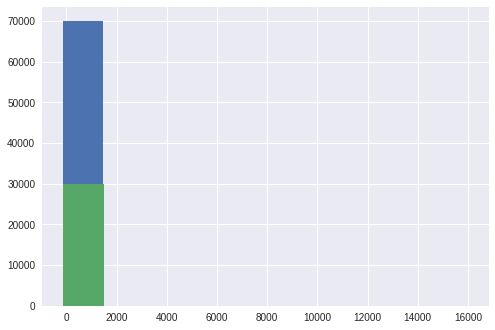

In [19]:
train.ap_hi.hist()
test.ap_hi.hist()
plot.show()

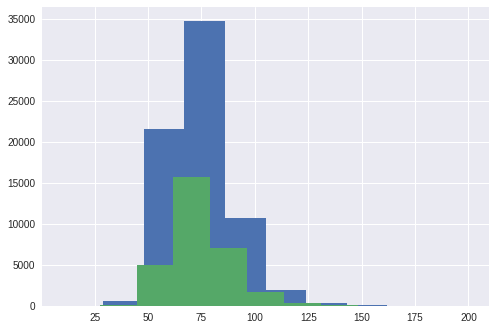

In [15]:
train.weight.hist()
test.weight.hist()
plot.show()

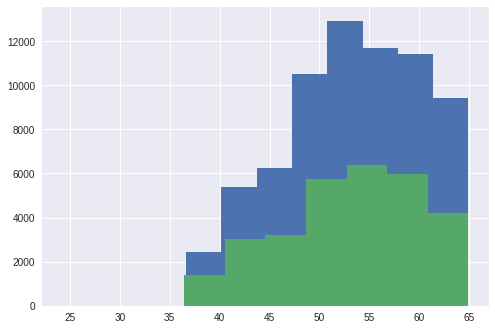

In [16]:
(train.age/365.25).hist()
(test.age/365.25).hist()
plot.show()

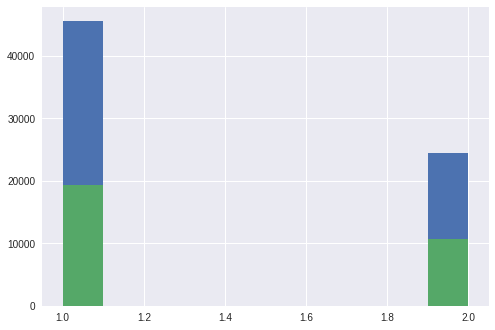

In [17]:
train.gender.hist()
test.gender.hist()
plot.show()

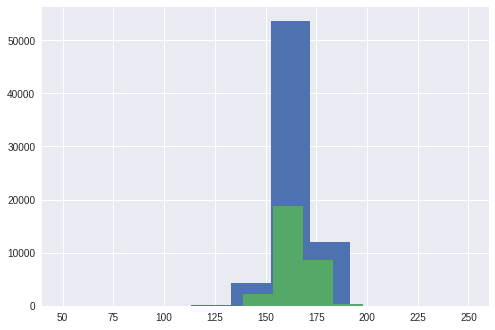

In [18]:
train.height.hist()
test.height.hist()
plot.show()